In [99]:
# import packages
%matplotlib inline 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve
import seaborn as sns

In [73]:
# load data
data = load_breast_cancer()

In [74]:
# get features and target
X = data.data
y = data.target

In [75]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.3)

In [90]:
# fit logisitc regression model
model = LogisticRegression(max_iter=20)
model.fit(X_train,y_train)

/Users/egorhowell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=20)

In [91]:
# get predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

### Confusion Matrix

In [92]:
cf_matrix = confusion_matrix(y_pred, y_test)

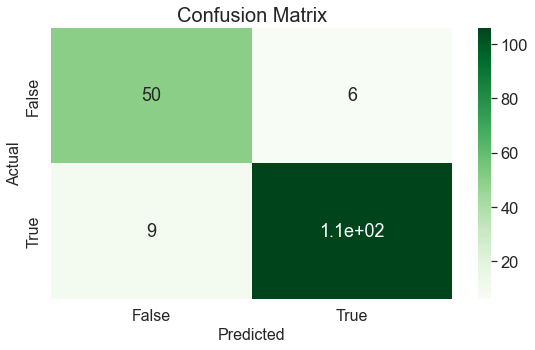

In [93]:
plt.figure(figsize=(9,5))
sns.set(font_scale=1.5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')

ax.set_title('Confusion Matrix', fontsize=20);
ax.set_xlabel('Predicted', fontsize=16)
ax.set_ylabel('Actual', fontsize=16);

ax.xaxis.set_ticklabels(['False','True'], fontsize=16)
ax.yaxis.set_ticklabels(['False','True'], fontsize=16)

plt.savefig('cf.png')
plt.show()

### Recall, Precision and F1 vs Threshold Curve

In [94]:
# get precisions, recalls and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob[:,1])

In [95]:
f1 = 2*precisions*recalls/(precisions+recalls)

In [104]:
plt.style.use("bmh")
plt.rcParams.update({"axes.facecolor" : "white", "axes.edgecolor":  "black"})

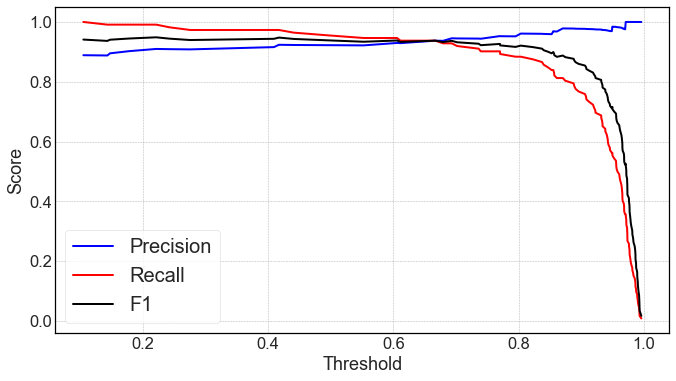

In [106]:
plt.figure(figsize=(11,6))
plt.plot(thresholds,precisions[:-1], label='Precision', linewidth=2, color='blue')
plt.plot(thresholds,recalls[:-1], label='Recall', linewidth=2, color='red')
plt.plot(thresholds,f1[:-1], label='F1', linewidth=2, color='black')
plt.legend(fontsize=20)
plt.xlabel('Threshold', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.grid(True)
plt.savefig('filename.png', facecolor='w', transparent=False)
plt.show()